Se non abbiamo mai installato le librerie pgmpy, networkx e matplotlib è necessario eseguire la cella seguente altrimenti si puà procedere alla cella successiva.

In [4]:
!pip install pgmpy
!pip install networkx
!pip install matplotlib


In questo notebook proviamo a modellare una situazione di vita quotidiana come un appuntamento in un luogo da raggiungere con il treno considerando variabili come la pioggia e la manutenzione del sistema trena linea ferroviaria.
La rete di Bayes usata è riportata qui di seguito.

![rete di Bayes treno.png](<attachment:rete di Bayes treno.png>)
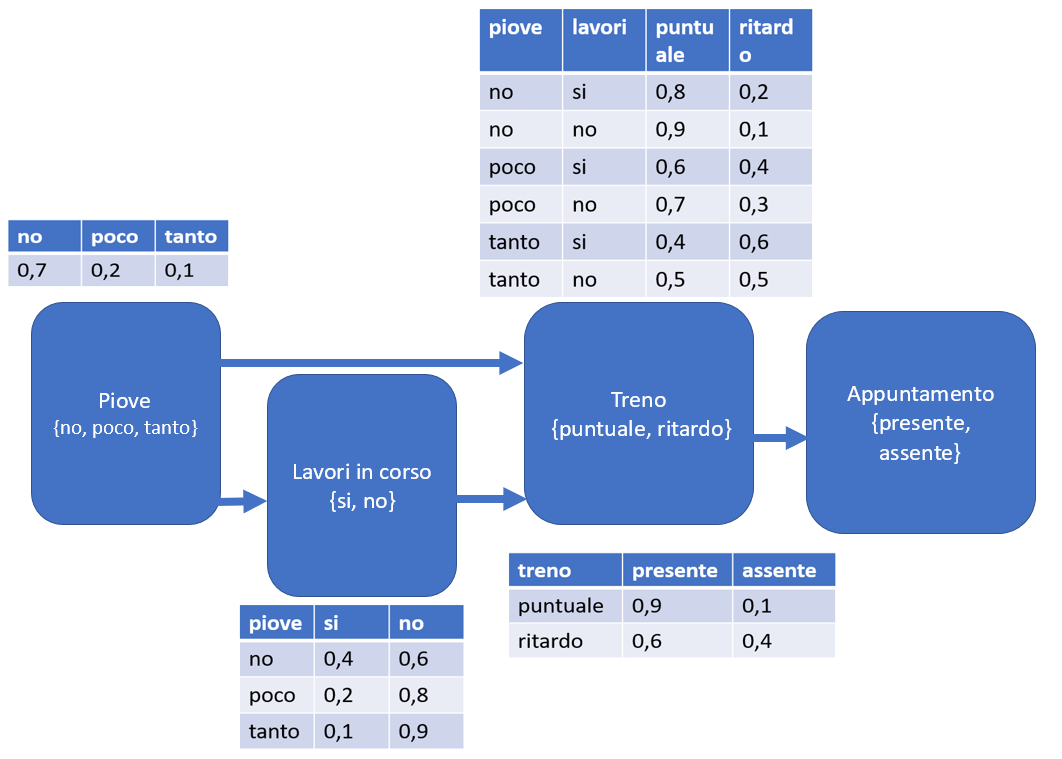

Il codice Python che creeremo usa la libreria **pgmpy** per creare e analizzare una rete bayesiana che modella le relazioni tra variabili legate a eventi quotidiani come la pioggia, la manutenzione dei treni, la puntualità dei treni e la presenza a un appuntamento.

---

**Descrizione del codice:**

1. **Importazione delle librerie necessarie:**

   ```python
   from pgmpy.models import BayesianNetwork
   from pgmpy.factors.discrete import TabularCPD
   ```

   - **BayesianNetwork**: classe per creare la struttura della rete bayesiana.
   - **TabularCPD**: classe per definire le Distribuzioni di Probabilità Condizionate (CPD) per le variabili discrete.

2. **Definizione della struttura della rete:**

   ```python
   model = BayesianNetwork([('pioggia', 'manutenzione'), 
                            ('pioggia', 'treno'), 
                            ('manutenzione', 'treno'), 
                            ('treno', 'appuntamento')])
   ```

   La rete è composta dai seguenti nodi e relazioni:

   - **pioggia**: influenza **manutenzione** e **treno**.
   - **manutenzione**: influenza **treno**.
   - **treno**: influenza **appuntamento**.

3. **Definizione delle CPD per ogni nodo:**

   - **Nodo "pioggia":**

     ```python
     cpd_pioggia = TabularCPD(variable='pioggia', variable_card=3, 
                              values=[[0.7], [0.2], [0.1]],
                              state_names={'pioggia': ['no', 'lieve', 'intensa']})
     ```

     - **Stati**: 'no' (70%), 'lieve' (20%), 'intensa' (10%).
     - Rappresenta la probabilità a priori della pioggia.

   - **Nodo "manutenzione" dato "pioggia":**

     ```python
     cpd_manutenzione = TabularCPD(variable='manutenzione', variable_card=2, 
                                   values=[[0.6, 0.8, 0.9],
                                           [0.4, 0.2, 0.1]],
                                   evidence=['pioggia'], evidence_card=[3],
                                   state_names={'manutenzione': ['si', 'no'],
                                                'pioggia': ['no', 'lieve', 'intensa']})
     ```

     - **Stati di "manutenzione"**: 'si', 'no'.
     - Le probabilità cambiano in base allo stato di "pioggia".
     - Ad esempio, se la pioggia è "intensa", la probabilità che si debba fare manutenzione è più alta.

   - **Nodo "treno" dato "pioggia" e "manutenzione":**

     ```python
     cpd_treno = TabularCPD(variable='treno', variable_card=2,
                            values=[[0.8, 0.9, 0.6, 0.7, 0.4, 0.5],
                                    [0.2, 0.1, 0.4, 0.3, 0.6, 0.5]],
                            evidence=['pioggia', 'manutenzione'], evidence_card=[3, 2],
                            state_names={'treno': ['puntuale', 'ritardo'],
                                         'pioggia': ['no', 'lieve', 'intensa'],
                                         'manutenzione': ['si', 'no']})
     ```

     - **Stati di "treno"**: 'puntuale', 'ritardo'.
     - La puntualità del treno dipende sia dalla pioggia che dalla manutenzione.
     - Le probabilità sono definite per tutte le combinazioni degli stati di "pioggia" e "manutenzione".

   - **Nodo "appuntamento" dato "treno":**

     ```python
     cpd_appuntamento = TabularCPD(variable='appuntamento', variable_card=2,
                                   values=[[0.9, 0.6],
                                           [0.1, 0.4]],
                                   evidence=['treno'], evidence_card=[2],
                                   state_names={'appuntamento': ['presente', 'assente'],
                                                'treno': ['puntuale', 'ritardo']})
     ```

     - **Stati di "appuntamento"**: 'presente', 'assente'.
     - La probabilità di essere presenti all'appuntamento dipende dalla puntualità del treno.

4. **Aggiunta delle CPD al modello e verifica:**

   ```python
   model.add_cpds(cpd_pioggia, cpd_manutenzione, cpd_treno, cpd_appuntamento)
   print("Il modello è corretto: ", model.check_model())
   ```

   - Le CPD vengono aggiunte al modello.
   - Si verifica che il modello sia consistente e valido.

5. **Stampa delle CPD per ciascun nodo:**

   ```python
   for cpd in model.get_cpds():
       print("CPD di {variable}:".format(variable=cpd.variable))
       print(cpd) 
   ```

   - Si stampano le tabelle di probabilità per ogni variabile, mostrando le probabilità condizionate.

---

**Interrogazione del modello:**

**Obiettivo:** Calcolare la probabilità di essere presenti all'appuntamento dato che il treno è in ritardo e sta piovendo intensamente.

**Passi per l'interrogazione:**

1. **Importare il modulo per l'inferenza:**

   ```python
   from pgmpy.inference import VariableElimination
   ```

2. **Creare un oggetto per l'inferenza:**

   ```python
   infer = VariableElimination(model)
   ```

3. **Definire l'evidenza:**

   - **Pioggia**: 'intensa'.
   - **Treno**: 'ritardo'.

   ```python
   evidence = {'pioggia': 'intensa', 'treno': 'ritardo'}
   ```

4. **Eseguire la query per ottenere la distribuzione a posteriori di "appuntamento":**

   ```python
   posterior = infer.query(variables=['appuntamento'], evidence=evidence)
   ```

5. **Stampare i risultati:**

   ```python
   print(posterior)
   ```

**Codice completo per l'interrogazione:**

```python
from pgmpy.inference import VariableElimination

# Creiamo l'oggetto inferenza
infer = VariableElimination(model)

# Definiamo l'evidenza
evidence = {'pioggia': 'intensa', 'treno': 'ritardo'}

# Calcoliamo la distribuzione a posteriori per "appuntamento"
posterior = infer.query(variables=['appuntamento'], evidence=evidence)

# Stampiamo i risultati
print("Probabilità di essere presenti all'appuntamento dato che piove intensamente e il treno è in ritardo:")
print(posterior)
```

**Interpretazione dei risultati:**

Il risultato mostrerà le probabilità aggiornate per gli stati di "appuntamento":

- $P(\text{appuntamento} = \text{'presente'} \mid \text{pioggia} = \text{'intensa'}, \text{treno} = \text{'ritardo'})$
- $P(\text{appuntamento} = \text{'assente'} \mid \text{pioggia} = \text{'intensa'}, \text{treno} = \text{'ritardo'})$

Questo ci permette di comprendere l'impatto che la pioggia intensa e il ritardo del treno hanno sulla probabilità di essere presenti all'appuntamento.

---
Eseguendo la cella qui sotto creiamo il modello di rete Bayesiana fin qui descritta.

In [15]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD

# Definiamo la struttura della rete
model = BayesianNetwork([('pioggia', 'manutenzione'), 
                         ('pioggia', 'treno'), 
                         ('manutenzione', 'treno'), 
                         ('treno', 'appuntamento')])

# Definiamo le CPD (Conditional Probability Distribution) per ogni nodo

# CPD per il nodo pioggia
cpd_pioggia = TabularCPD(variable='pioggia', variable_card=3, 
                         values=[[0.7], [0.2], [0.1]],
                         state_names={'pioggia': ['no', 'lieve', 'intensa']})

# CPD per il nodo manutenzione
cpd_manutenzione = TabularCPD(variable='manutenzione', variable_card=2, 
                              values=[[0.6, 0.8, 0.9],
                                      [0.4, 0.2, 0.1]],
                              evidence=['pioggia'], evidence_card=[3],
                              state_names={'manutenzione': ['si', 'no'],
                                           'pioggia': ['no', 'lieve', 'intensa']})

# CPD per il nodo treno
cpd_treno = TabularCPD(variable='treno', variable_card=2,
                       values=[[0.8, 0.9, 0.6, 0.7, 0.4, 0.5],
                               [0.2, 0.1, 0.4, 0.3, 0.6, 0.5]],
                       evidence=['pioggia', 'manutenzione'], evidence_card=[3, 2],
                       state_names={'treno': ['puntuale', 'ritardo'],
                                    'pioggia': ['no', 'lieve', 'intensa'],
                                    'manutenzione': ['si', 'no']})

# CPD per il nodo appuntamento
cpd_appuntamento = TabularCPD(variable='appuntamento', variable_card=2,
                              values=[[0.9, 0.6],
                                      [0.1, 0.4]],
                              evidence=['treno'], evidence_card=[2],
                              state_names={'appuntamento': ['presente', 'assente'],
                                           'treno': ['puntuale', 'ritardo']})

# Aggiungiamo le CPD al modello
model.add_cpds(cpd_pioggia, cpd_manutenzione, cpd_treno, cpd_appuntamento)

# Verifichiamo che il modello sia valido
print("Il modello è corretto: ", model.check_model())

# Stampa del modello
for cpd in model.get_cpds():
    print("CPD di {variable}:".format(variable=cpd.variable))
    print(cpd)



Il modello è corretto:  True
CPD di pioggia:
+------------------+-----+
| pioggia(no)      | 0.7 |
+------------------+-----+
| pioggia(lieve)   | 0.2 |
+------------------+-----+
| pioggia(intensa) | 0.1 |
+------------------+-----+
CPD di manutenzione:
+------------------+-------------+----------------+------------------+
| pioggia          | pioggia(no) | pioggia(lieve) | pioggia(intensa) |
+------------------+-------------+----------------+------------------+
| manutenzione(si) | 0.6         | 0.8            | 0.9              |
+------------------+-------------+----------------+------------------+
| manutenzione(no) | 0.4         | 0.2            | 0.1              |
+------------------+-------------+----------------+------------------+
CPD di treno:
+-----------------+-----+------------------+
| pioggia         | ... | pioggia(intensa) |
+-----------------+-----+------------------+
| manutenzione    | ... | manutenzione(no) |
+-----------------+-----+------------------+
| treno(p

Eseguendo la cella qui sotto possiamo vedere il grafo della rete creata:

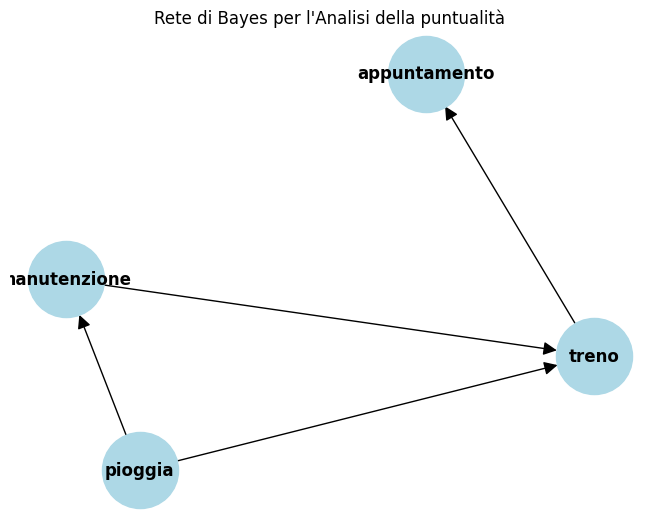

In [13]:

import networkx as nx
import matplotlib.pyplot as plt

# Assumendo che 'model' sia il tuo BayesianNetwork già definito
G = nx.DiGraph()
G.add_edges_from(model.edges())

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue',
        node_size=3000, arrowsize=20, font_size=12, font_weight='bold')

plt.title("Rete di Bayes per l'Analisi della puntualità")
plt.axis('off')
plt.show()

Eseguendo la cella qui di seguito possiamo interrogare la rete:

In [30]:
from pgmpy.inference import VariableElimination

# Creiamo un oggetto per l'inferenza
inference = VariableElimination(model)

# Definiamo l'evidenza per la situazione descritta
evidence = {'pioggia': 'intensa', 'treno': 'puntuale'}

# Calcoliamo la probabilità di colpevolezza dato l'evidenza
result = inference.query(['appuntamento'], evidence=evidence)

# Stampiamo il risultato
print("Probabilità di arrivare puntuali all'appuntamento:")
print(result.values)

Probabilità di arrivare puntuali all'appuntamento:
[0.852 0.148]


In [4]:
from pgmpy.inference import VariableElimination

# Creiamo l'oggetto inferenza
infer = VariableElimination(model)

# Definiamo l'evidenza
evidence = {'pioggia': 'intensa', 'manutenzione': "si"}

# Calcoliamo la distribuzione a posteriori per "appuntamento"
posterior = infer.query(variables=['appuntamento'], evidence=evidence)

# Stampiamo i risultati
print("Probabilità di essere presenti all'appuntamento dato che piove intensamente e il treno è in ritardo:")
print(posterior)


Probabilità di essere presenti all'appuntamento dato che piove intensamente e il treno è in ritardo:
+------------------------+---------------------+
| appuntamento           |   phi(appuntamento) |
+========================+=====================+
| appuntamento(presente) |              0.7200 |
+------------------------+---------------------+
| appuntamento(assente)  |              0.2800 |
+------------------------+---------------------+
